In [142]:
from gridworld import *
from chvi import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import time
import itertools

In [144]:
X = 7
Y = 3
S = X * Y
dims = (X, Y)
A = 4
reward_coord = [(0, 0), (X - 1, 0)]
rewards = np.array([[0,1], [1,0]])
R = make_R(X = X, Y = Y, reward_coord = reward_coord, rewards = rewards)
gamma = 0.9
s0 = state_to_index((3, 0), dims)
N = 20
epsilon = 0.1
palette_list = ['rocket', 'tab10', 'mako', 'Spectral'] # List of distinct color palettes

In [145]:
T_dict = {}
wall_dict = {}

# Advantaged group
wall_dict['easy'] = []
T_dict['easy'] = make_T(wall_coord = wall_dict['easy'], X = X, Y = Y, reward_coord = reward_coord)

# Blocked group
wall_dict['blocked'] = [(5,0), (5,1)]
T_dict['blocked'] = make_T(wall_coord = wall_dict['blocked'], X = X, Y = Y, reward_coord = reward_coord)

# Unreliable access group
wall_dict['unreliable'] = []
T_dict['unreliable'] = make_T(wall_coord = wall_dict['unreliable'], X = X, Y = Y, reward_coord = reward_coord, p_east =0.6)

# Superficially blocked group
wall_dict['superficial block'] = [(1,2), (2,2), (6,2)]
T_dict['superficial block'] = make_T(wall_coord = wall_dict['superficial block'], X = X, Y = Y, reward_coord = reward_coord)

# Save group names for easy looping
group_names = T_dict.keys()
print(group_names)

[]
[15, 16]
[]
[5, 8, 20]
dict_keys(['easy', 'blocked', 'unreliable', 'superficial block'])


In [146]:
Q_dict = {}
chvi_time_dict = {}
for group_name in group_names: 
    print(group_name.upper())
    start = time.time()
    Q_dict[group_name] = chvi(T_dict[group_name], R, gamma, max_delta = 0.0001)
    end = time.time()
    chvi_time_dict[group_name] = end - start
    print("\n\n")

EASY
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Not converged because shapes don't match...
Shapes match, delta is 0.014905825594317662...
Shapes match, delta is 0.013415243034885907...
Shapes match, delta is 0.012073718731397315...
Shapes match, delta is 0.010866346858257589...
Shapes match, d

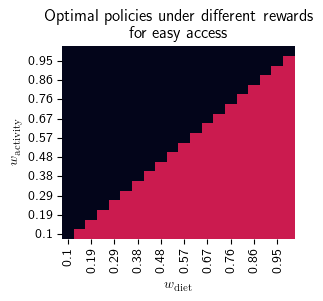

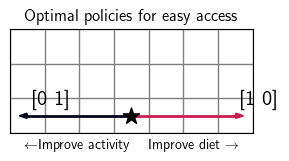

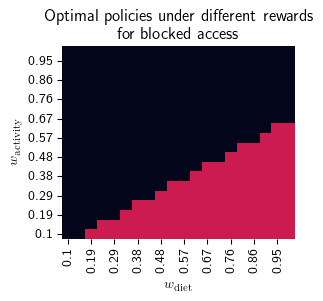

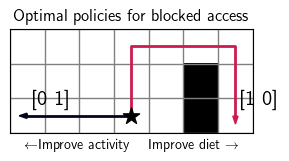

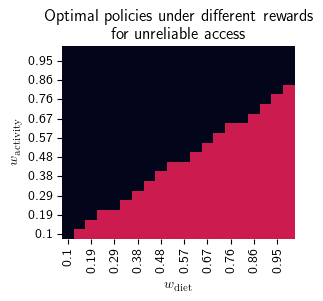

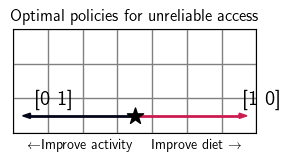

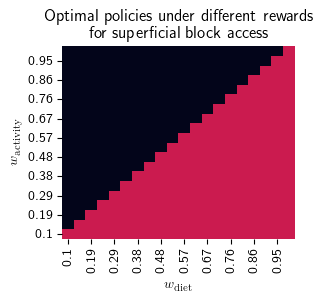

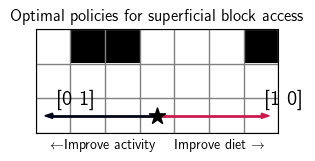

In [147]:
# Store policies per group, print behavior space, print behaviors in world
policy_dict = {}
V0_dict = {}
baseline_time_dict = {}

for i, group_name in enumerate(group_names): 
    # Get policies and plot
    fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
    start = time.time()
    trajectories, states, colors, policies, qq = plot_reward_space(Q_dict[group_name], T_dict[group_name], s0 = s0, by_policy = True, N1 = N, N2 = N, ax = ax, cmap = "rocket")
    end = time.time()
    if group_name == "easy": 
        baseline_time_dict[group_name] = chvi_time_dict['easy'] + (end - start)
    else: 
        baseline_time_dict[group_name] = chvi_time_dict['easy'] + chvi_time_dict[group_name] + (end - start)
    
    plt.title("Optimal policies under different rewards\n for {} access".format(group_name))
    plt.xlabel("$w_\mathrm{diet}$")
    plt.ylabel("$w_\mathrm{activity}$")
    plt.savefig("figures/reward_policies_{}.pdf".format(group_name), bbox_inches = "tight")
    plt.show()
    
    # Plot world
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    plot_world(reward_coord = reward_coord, rewards = rewards, wall_coord = wall_dict[group_name], dims = dims, scale = 1.5,s0 = s0, ax = ax,
               traj_actions = trajectories, traj_states = states, colors = colors)
    plt.xlabel("$\leftarrow$Improve activity \quad Improve diet $\\rightarrow$", size = 10)
    plt.title("Optimal policies for {} access".format(group_name), size = 12)
    plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig("figures/policies_{}.pdf".format(group_name), bbox_inches = "tight")
    plt.show()
    

    
    # Store policies
    policy_dict[group_name] = policies    
    
    # Store start values
    V0_dict[group_name] = qq

## Brute force solution

In [148]:
def plot_reward_effect(group1,  V0_dict, ax = None, epsilon = None, group2 = None):
    if group2 is not None: 
        V_diff = np.abs(V0_dict[group1] - V0_dict[group2])
        if epsilon is None:
            V_plot = V_diff
        else: 
            V_plot = np.zeros(V_diff.shape)
            V_plot[V_diff > epsilon] = 1
    else: 
        V_plot = V0_dict[group1]
    V_plot = np.flip(V_plot, axis = 0)
    ax.imshow(V_plot, cmap = "Reds", vmin = 0, vmax = 1, extent = [0, 1, 0, 1])
    plt.xlabel("$w_\mathrm{diet}$")
    plt.ylabel("$w_\mathrm{activity}$")

In [149]:
_, _, _, _ qq_easy = plot_reward_space(Q_dict['easy'], T_dict['easy'], s0 = s0, by_policy = True, N1 = 10, N2 = 10, ax = ax, cmap = "rocket")
_, _, _, _, qq_blocked = plot_reward_space(Q_dict['blocked'], T_dict['blocked'], s0 = s0, by_policy = True, N1 = 10, N2 = 10, ax = ax, cmap = "rocket")

V_dict = {'easy': qq_easy, 'blocked': qq_blocked}

fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
plot_reward_effect("easy", V_dict, ax = ax, epsilon = epsilon)
ax.set_title("Start values, easy access")    
plt.savefig("figures/naive-step-1.pdf", bbox_inches = "tight")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
plot_reward_effect("easy", V_dict, ax = ax, epsilon = epsilon)
ax.set_title("Start values, blocked access")    
plt.savefig("figures/naive-step-2.pdf", bbox_inches = "tight")
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3546043271.py, line 1)

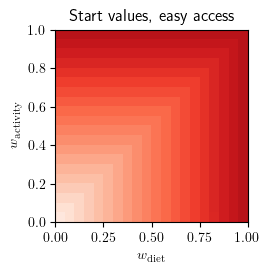

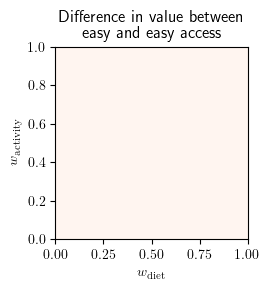

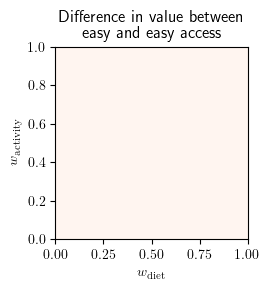

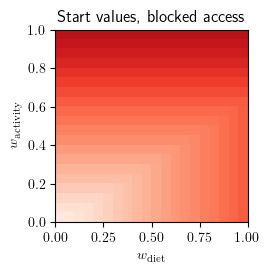

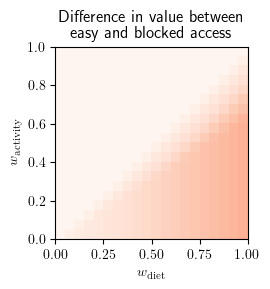

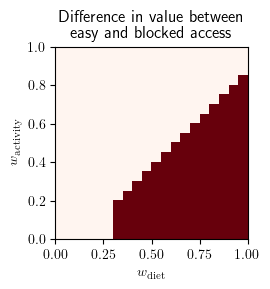

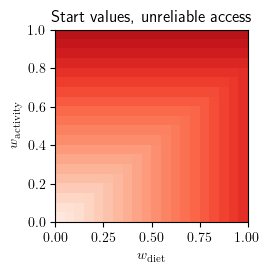

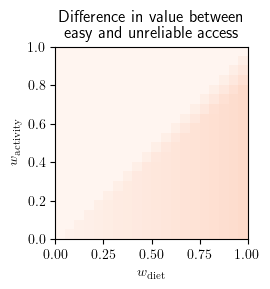

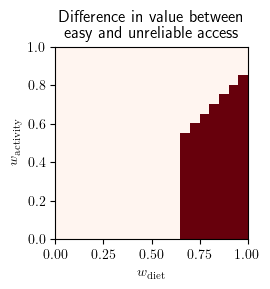

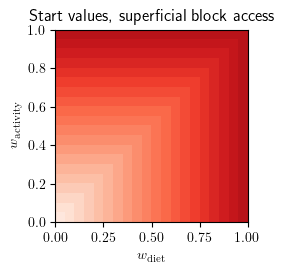

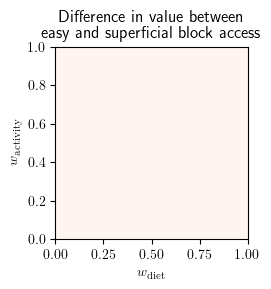

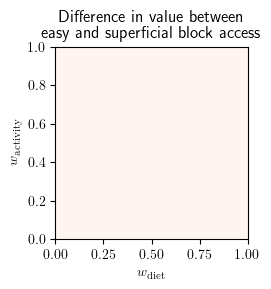

In [150]:
for group_name in group_names:     
    fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
    plot_reward_effect(group_name, V0_dict, ax = ax, epsilon = epsilon)
    ax.set_title("Start values, {} access".format(group_name))    
    plt.savefig("figures/start_values_{}.pdf".format(group_name), bbox_inches = "tight")
    plt.show()
    
    fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
    plot_reward_effect("easy", V0_dict, ax = ax, group2 = group_name)
    ax.set_title("Difference in value between\n {} and {} access".format("easy", group_name))    
    plt.savefig("figures/reward_value_diff_{}.pdf".format(group_name), bbox_inches = "tight")
    plt.show()
    
    fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
    plot_reward_effect("easy", V0_dict, ax = ax, epsilon = epsilon, group2 = group_name)
    ax.set_title("Difference in value between\n {} and {} access".format("easy", group_name))    
    plt.savefig("figures/reward_value_diff_thresholded_{}.pdf".format(group_name), bbox_inches = "tight")
    plt.show()

## Our solution

* Visualize feasible regions according to my idea
* Implement linear programming

In [151]:
def multi_policy_evaluation(pi, T, R, gamma):
    '''
    R is [S x A x S x U]
    T is [S x A x S]
    pi is [S x 1]
    '''
    # Turn policy into S x A
    pi_actions = np.zeros((T.shape[0], T.shape[1]))
    for s in range(T.shape[0]): 
        pi_actions[s, int(pi[s])] = 1.
    
    T_pi = np.vstack([pi_actions[s, :].dot(T[s, :, :]) for s in range(S)]) # S x S
    R_T = np.array([[T[s, a, :].dot(R[s, a, :, :]) for a in range(A)] for s in range(S)]) # S x A x U
    R_T = np.transpose(R_T, axes = [0, 2, 1]) # S x U x A
    R_pi = np.hstack([R_T[s, :, :].dot(pi_actions[s, :].T).reshape(-1, 1) for s in range(S)]).T # S x U

    inv = np.linalg.inv(np.eye(S) - (gamma * T_pi)) # S x S
    V = inv.dot(R_pi) # S x U
    
    return V


In [152]:
from matplotlib.patches import Patch
def plot_viable_rewards(policies1, T1, T2, R, gamma, epsilon = 0.1, ax = None): 
    # Find policies where going to other world is DIFFERENT
    V_home = np.array([np.around(multi_policy_evaluation(policy, T1, R, gamma)[s0], 5) for policy in policies1])
    V_outside = np.array([np.around(multi_policy_evaluation(policy, T2, R, gamma)[s0], 5) for policy in policies1])
    delta = V_home - V_outside
    V_home = V_home[np.abs(delta).sum(axis = 1) > 0]
    V_home = np.unique(V_home, axis = 0)
    V_outside = np.unique(V_outside, axis = 0)
    # For those policies, see the best we can do 
    for V, V_ in itertools.product(V_home, V_outside): 
        delta = V - V_
        print(V, V_, delta)
        print("Made it ", V, V_, delta)
        print(delta[1] == 0)
        if delta[0] == 0: 
            f = lambda x: (epsilon - (delta[0] * x)) / delta[1]
            print("Must be below horizontal line ", f(0))
            # Plot and shade the constraint
            x = np.linspace(0, 1, 100)
            ax.axhline(f(0))
            ax.axhspan(0, f(0),alpha = 0.1)
        elif delta[1] == 0: 
            print("HERE")
            f = lambda x: (epsilon - (delta[1] * x))/delta[0]
            # Plot and shade the constraint
            print("Must be below vertical line ", f(0))
            x = np.linspace(0, 1, 100)
            ax.axvline(f(0))
            ax.axvspan(0, f(0), alpha = 0.1)
        else: 
            f = lambda x: (epsilon - (delta[0] * x))/delta[1]
            # Plot and shade the constraint
            print("Must be below line ", f(0))
            x = np.linspace(0, 1, 100)
            ax.plot(x, f(x))
            ax.fill_between(x, f(x), np.ones(x.shape), alpha = 0.1)
        print("\n")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

Method doesn't account for the adaptivity of the disadvantaged group policy when unpreferred reward is weighted; our method should be more conservative than truth. 

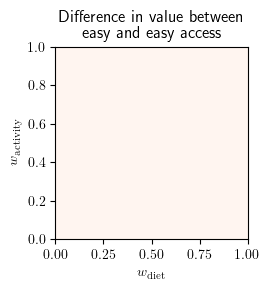

[0.81 0.  ] [0. 0.] [0.81 0.  ]
Made it  [0.81 0.  ] [0. 0.] [0.81 0.  ]
True
HERE
Must be below vertical line  0.12345679012345678


[0.81 0.  ] [0.   0.81] [ 0.81 -0.81]
Made it  [0.81 0.  ] [0.   0.81] [ 0.81 -0.81]
False
Must be below line  -0.12345679012345678




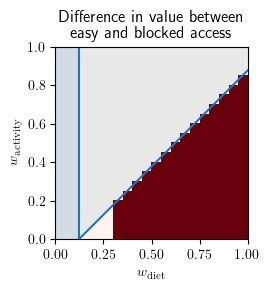

[0.81 0.  ] [0.   0.81] [ 0.81 -0.81]
Made it  [0.81 0.  ] [0.   0.81] [ 0.81 -0.81]
False
Must be below line  -0.12345679012345678


[0.81 0.  ] [0.66742 0.     ] [0.14258 0.     ]
Made it  [0.81 0.  ] [0.66742 0.     ] [0.14258 0.     ]
True
HERE
Must be below vertical line  0.7013606396409032




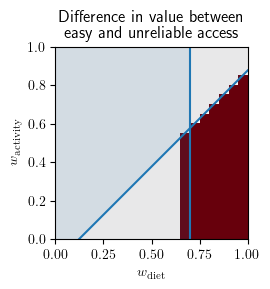

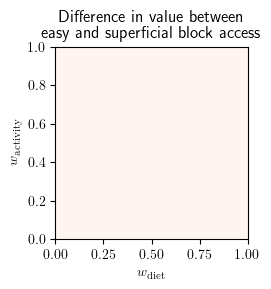

In [153]:
our_time_dict = {}
for dis in group_names: 
    T2 = T_dict[dis]
    T1 = T_dict['easy']
    policies1 = policy_dict['easy']

    fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))

    plot_reward_effect('easy',  V0_dict, ax = ax, epsilon = epsilon, group2 = dis)

    start = time.time()
    plot_viable_rewards(policies1, T1, T2, R, gamma, epsilon = epsilon, ax = ax)
    end = time.time()
    ax.set_title("Difference in value between\n {} and {} access".format("easy", dis))   
    plt.savefig("figures/both_methods_{}.pdf".format(dis), bbox_inches = "tight")
    plt.show()
    
    our_time_dict[dis] = chvi_time_dict['easy'] + (end - start)

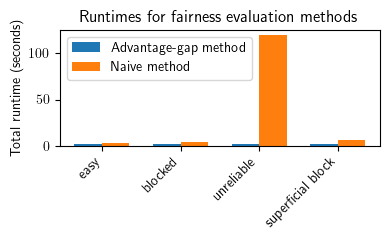

In [154]:
fig, ax = plt.subplots(1, 1, figsize = (4, 2.5))

# Extracting keys and values
labels = list(our_time_dict.keys())
our_values = [our_time_dict[key] for key in labels]
baseline_values = [baseline_time_dict[key] for key in labels]

# Setting up the positions for the bars
x = np.arange(len(labels))
width = 0.35  # Width of the bars

# Creating the grouped bar plot
rects1 = ax.bar(x - width/2, our_values, width, label='Advantage-gap method')
rects2 = ax.bar(x + width/2, baseline_values, width, label='Naive method')

# Adding labels, title, and legend
ax.set_ylabel('Total runtime (seconds)')
ax.set_title('Runtimes for fairness evaluation methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Displaying the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/runtimes.pdf", bbox_inches = "tight")
plt.show()